In [0]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/matrix'

/content/drive/My Drive/Colab Notebooks/matrix


In [4]:
ls data

shoes_prices.csv  shoes_prices.gsheet


In [0]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)

In [8]:
df.shape

(19387, 48)

In [9]:
df.columns


Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [15]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

111.95223800144517

In [0]:
df['prices_amountmin'] = pd.to_numeric(df['prices_amountmin'], errors='coerce')

In [0]:
y_true = df['prices_amountmin']

In [20]:
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

88.9487551815721

In [0]:
df['prices_amountmin'].dropna(inplace=True)

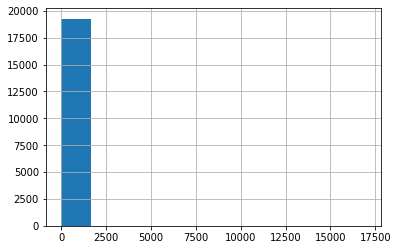

In [24]:
df['prices_amountmin'].hist(bins=10)

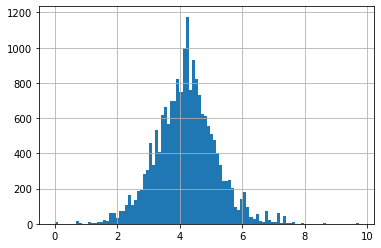

In [25]:
np.log (df['prices_amountmin'] +1).hist(bins=100)

In [27]:
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

76.10938322794651

In [29]:
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

76.11865171284919

In [30]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [31]:
df.brand.value_counts()

Nike                      1710
Ralph Lauren               697
PUMA                       574
New Balance                361
VANS                       356
                          ... 
KeHE Distributors            1
AG Adriano Goldschmied       1
LOUIS M GERSON               1
Seven color cotton           1
JYinstyle                    1
Name: brand, Length: 1960, dtype: int64

In [51]:
df['brand'].factorize()

(array([  0,   0,   1, ..., 441, 441, 441]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Hao-bo',
        'Twisted X', 'Lacoste', 'Rubies', 'unbranded', 'PUMA',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1960))

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
 X = df[ ['brand_cat']].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y,scoring='neg_mean_absolute_error')


In [0]:
from sklearn.model_selection import cross_val_score

In [60]:
np.mean(scores), np.std(scores)

(-77.6668049401954, 12.560978863643957)

In [56]:
df = df.fillna(df.median()).clip(-1e11,1e11)

TypeError: ignored

In [0]:
df = df.fillna(0)

In [0]:
def run_model(feats):
  X = df[ feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y,scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [67]:
run_model(['brand_cat'])

(-77.6668049401954, 12.560978863643957)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
df['reviews_cat'] = df['reviews'].factorize()[0]

In [0]:
df['quantities_cat'] = df['quantities'].factorize()[0]

In [79]:
run_model(['quantities_cat'])

(-88.86385308306156, 9.478966999797922)

In [83]:
run_model(['quantities_cat', 'reviews_cat'])

(-89.01396514387514, 9.929785502187242)

In [0]:
!git add 